<a href="https://colab.research.google.com/github/AnujaTheophilus/Newrepo/blob/main/DailyTask_Unsupervisedlearning_Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fish.csv to fish.csv


In [ ]:
df = pd.read_csv('/content/fish.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
df.columns = ['Species','Weight','Length1','Length2','Length3','Height','Width']
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [ ]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
X = df.drop('Species',axis=1)
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

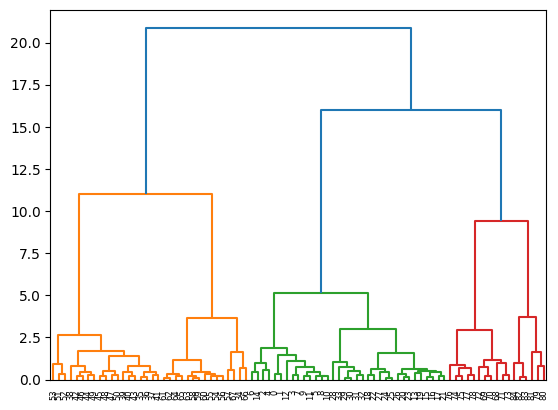

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2])

In [ ]:
df['Cluster'] = y_hc
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,0,242.0,23.2,25.4,30.0,38.4,13.4,0
1,0,290.0,24.0,26.3,31.2,40.0,13.8,0
2,0,340.0,23.9,26.5,31.1,39.8,15.1,0
3,0,363.0,26.3,29.0,33.5,38.0,13.3,0
4,0,430.0,26.5,29.0,34.0,36.6,15.1,0


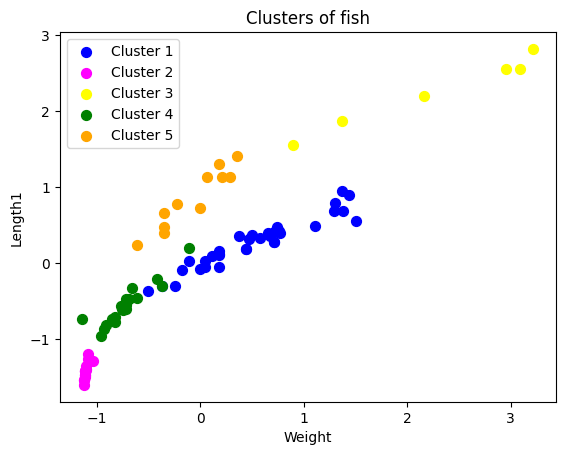

In [ ]:
plt.scatter(X[y_hc == 0,0],X[y_hc ==0,1],s=50,c='blue',label='Cluster 1')
plt.scatter(X[y_hc == 1,0],X[y_hc ==1,1],s=50,c='magenta',label='Cluster 2')
plt.scatter(X[y_hc == 2,0],X[y_hc ==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[y_hc == 3,0],X[y_hc ==3,1],s=50,c='green',label='Cluster 4')
plt.scatter(X[y_hc == 4,0],X[y_hc ==4,1],s=50,c='orange',label='Cluster 5')
plt.title('Clusters of fish')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.legend()
plt.show()